## Tematem projektu jest problem klasyfikacji stanu zdrowotnego płodów, analizując wpływ poszczególnych cech na to, czy płód jest fizjologiczny (zdrowy) czy patologiczny.

### 1. Załadowanie niezbędnych bibliotek

In [98]:
import pandas as pd
from copy import deepcopy
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### 2. Wczytanie zbioru danych

In [99]:
fetals = pd.read_csv("fetal_health.csv")

### 3. Histogram przedstawiający liczby płodów w określonych stanach w załadowanym zbiorze danych
1. Fizjologia (Płód zdrowy)
2. Podejrzenie patologii
3. Patologia

Text(0.5, 1.0, 'Histogram')

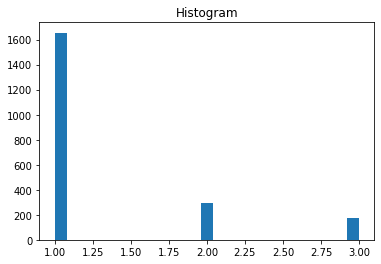

In [100]:
plt.hist(fetals['fetal_health'], 25)
plt.title('Histogram')

### 4. Normalizacja danych metodą min-max
y = (xi − min) / (max − min) ∗ (new_max − new_min) + new_min

In [102]:
# scaler = MinMaxScaler()        
# scaled_sample = scaler.fit_transform(fetals)
# scaled_pd = pd.DataFrame(scaled_sample, index=fetals.index, columns=fetals.columns)

#  Implementacja wzoru na normalizacje min-max
def normalize_min_max(column, new_min = 0, new_max = 1):
    return [((x - min(column)) / (max(column) - min(column))) * (new_max - new_min) + new_min for x in column]

fetals_min_max = fetals.copy()
for column in fetals_min_max.columns:
    fetals_min_max[column] = normalize_min_max(fetals[column])

# Po skalowaniu danych
fetals_min_max.head()



### 5. Standaryzacja danych
y = (xi − mean(X)) / std(X)

In [97]:
def standardize(column):
  return [(x - column.mean()) / column.std()  for x in column]

fetals_standardized = fetals.copy()
for column in fetals_standardized:
  fetals_standardized[column] = standardize(fetals[column])

fetals_standardized.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -1.351902      -0.822195       -0.203162             -1.482116   
1       -0.132494       0.729961       -0.203162              0.554496   
2       -0.030877      -0.046117       -0.203162              1.233367   
3        0.070740      -0.046117       -0.203162              1.233367   
4       -0.132494       0.988654       -0.203162              1.233367   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.638287             -0.057462                 -0.268691   
1             0.375155             -0.057462                 -0.268691   
2             0.375155             -0.057462                 -0.268691   
3             0.375155             -0.057462                 -0.268691   
4            -0.638287             -0.057462                 -0.268691   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         1.512834                             -0.942873   
1                        -1.744341                              0.868636   
2                        -1.802504                              0.868636   
3                        -1.802504                              1.208294   
4                        -1.802504                              1.208294   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                           1.802118       ...      -1.068311   
1                                          -0.535235       ...      -0.865335   
2                                          -0.535235       ...      -0.865335   
3                                          -0.535235       ...      -1.372774   
4                                          -0.535235       ...      -1.372774   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0      -2.119093                  -0.701232                   -0.458336   
1       1.893349                   0.654983                    0.957976   
2       1.893349                   0.315929                    0.957976   
3       0.332955                   2.350251                   -0.458336   
4       0.332955                   1.672144                   -0.458336   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0       -1.065363        0.153234         -1.181364            1.870129   
1        0.216587        0.089105          0.132007           -0.234943   
2        0.216587        0.024976         -0.006243           -0.200434   
3       -0.027594       -0.039153         -0.075367           -0.200434   
4       -0.027594        0.089105         -0.006243           -0.269452   

   histogram_tendency  fetal_health  
0            1.112718      1.132322  
1           -0.524402     -0.495343  
2           -0.524402     -0.495343  
3            1.112718     -0.495343  
4            1.112718     -0.495343  

[5 rows x 22 columns]

In [72]:
# Pozbywanie sie wartości NULL (czyszczenie danych)

fetals.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [27]:
fetals_copy = fetals.copy()
for column in fetals.columns:
    mapping_dict = {}
    map_int = 1
    for name in fetals[column].unique():
        
        mapping_dict[name] = map_int
        map_int+=1
    fetals[column] = fetals[column].map(mapping_dict)

#### Podgląd zbioru

In [29]:
fetals.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0               1              1               1                     1   
1               2              2               1                     2   
2               3              3               1                     3   
3               4              3               1                     3   
4               2              4               1                     3   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                    1                     1                         1   
1                    2                     1                         1   
2                    2                     1                         1   
3                    2                     1                         1   
4                    1                     1                         1   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                1                                     1   
1                                2                                     2   
2                                3                                     2   
3                                3                                     3   
4                                3                                     3   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                  1       ...              1   
1                                                  2       ...              2   
2                                                  2       ...              2   
3                                                  2       ...              3   
4                                                  2       ...              3   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0              1                          1                           1   
1              2                          2                           2   
2              2                          3                           2   
3              3                          4                           1   
4              3                          5                           1   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0               1               1                 1                   1   
1               2               2                 2                   2   
2               2               3                 3                   3   
3               3               4                 4                   3   
4               3               2                 3                   4   

   histogram_tendency  fetal_health  
0                   1             1  
1                   2             2  
2                   2             2  
3                   1             2  
4                   1             2  

[5 rows x 22 columns]

In [30]:
fetals.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean        19.793509       4.495767       15.406867              6.461900   
std         12.960108       4.144874       20.195504              3.813068   
min          1.000000       1.000000        1.000000              1.000000   
25%          8.000000       1.000000        1.000000              2.000000   
50%         21.000000       3.000000        1.000000              7.000000   
75%         30.000000       8.000000       33.000000             10.000000   
max         48.000000      20.000000      102.000000             16.000000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              3.412041              1.003293                  1.179210   
std               3.602682              0.057300                  0.668174   
min               1.000000              1.000000                  1.000000   
25%               1.000000              1.000000                  1.000000   
50%               1.000000              1.000000                  1.000000   
75%               5.000000              1.000000                  1.000000   
max              16.000000              2.000000                  6.000000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         35.833960                             25.021167   
std                          18.463502                             15.254763   
min                           1.000000                              1.000000   
25%                          21.000000                             10.000000   
50%                          36.000000                             27.000000   
75%                          50.000000                             38.000000   
max                          75.000000                             57.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        2126.000000       ...   
mean                                           14.753057       ...   
std                                            20.488107       ...   
min                                             1.000000       ...   
25%                                             2.000000       ...   
50%                                             2.000000       ...   
75%                                            23.000000       ...   
max                                            87.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       48.557855      37.169802                   6.661336   
std        32.849177      21.455351                   4.083952   
min         1.000000       1.000000                   1.000000   
25%        18.000000      21.000000                   3.000000   
50%        45.000000      35.000000                   7.000000   
75%        76.000000      55.000000                   9.000000   
max       109.000000      86.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     1.363123       29.512230       33.225306   
std                      0.806931       18.799089       22.637991   
min                      1.000000        1.000000        1.000000   
25%                      1.000000       12.000000       12.000000   
50%                      1.000000       29.000000       33.000000   
75%                      1.000000       42.000000       47.750000   
max                      9.000000       88.000000      103.000000   

       histogram_median  histogr

#### Dodanie 10% danych brakujących 

In [62]:
for col in fetals.columns:
    fetals.loc[fetals.sample(frac=0.1).index, col] = np.nan

In [63]:
fetals.isnull().sum()

baseline value                                            213
accelerations                                             213
fetal_movement                                            213
uterine_contractions                                      213
light_decelerations                                       213
severe_decelerations                                      213
prolongued_decelerations                                  213
abnormal_short_term_variability                           213
mean_value_of_short_term_variability                      213
percentage_of_time_with_abnormal_long_term_variability    213
mean_value_of_long_term_variability                       213
histogram_width                                           213
histogram_min                                             213
histogram_max                                             213
histogram_number_of_peaks                                 213
histogram_number_of_zeroes                                213
histogra

#### Podgląd zbioru z danymi brakującymi

In [33]:
fetals.head(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             1.0            1.0             1.0                   1.0   
1             2.0            2.0             1.0                   2.0   
2             NaN            3.0             1.0                   3.0   
3             4.0            3.0             1.0                   3.0   
4             2.0            4.0             1.0                   3.0   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  NaN                   1.0                       1.0   
1                  2.0                   1.0                       1.0   
2                  2.0                   1.0                       1.0   
3                  2.0                   1.0                       1.0   
4                  1.0                   1.0                       1.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                              1.0                                   1.0   
1                              2.0                                   2.0   
2                              NaN                                   2.0   
3                              3.0                                   3.0   
4                              3.0                                   3.0   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                NaN       ...            1.0   
1                                                2.0       ...            2.0   
2                                                NaN       ...            2.0   
3                                                2.0       ...            3.0   
4                                                2.0       ...            3.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            NaN                        1.0                         NaN   
1            NaN                        2.0                         2.0   
2            2.0                        3.0                         2.0   
3            3.0                        4.0                         1.0   
4            3.0                        5.0                         1.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             NaN             1.0               1.0                 1.0   
1             2.0             2.0               2.0                 2.0   
2             2.0             3.0               3.0                 3.0   
3             3.0             4.0               4.0                 3.0   
4             3.0             2.0               3.0                 4.0   

   histogram_tendency  fetal_health  
0                 1.0           NaN  
1                 NaN           2.0  
2                 NaN           2.0  
3                 1.0           2.0  
4                 1.0           2.0  

[5 rows x 22 columns]

#### Uzupełnienie danych brakujących metodami mediany, najczęściej występującej wartości i KNN

In [66]:
fetals_filled_median = fetals.copy()
for column_name in fetals_filled_median.columns:
    print(fetals[column_name])
    fetals_filled_median[column_name] = fetals_filled_median[column_name].fillna(fetals[column_name].median()) # mediana

0       120.0
1       132.0
2       133.0
3       134.0
4       132.0
        ...  
2121    140.0
2122    140.0
2123    140.0
2124    140.0
2125    142.0
Name: baseline value, Length: 2126, dtype: float64
0       0.000
1         NaN
2       0.003
3       0.003
4       0.007
        ...  
2121    0.000
2122    0.001
2123    0.001
2124    0.001
2125    0.002
Name: accelerations, Length: 2126, dtype: float64
0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
2121    0.000
2122    0.000
2123    0.000
2124    0.000
2125    0.002
Name: fetal_movement, Length: 2126, dtype: float64
0       0.000
1         NaN
2       0.008
3       0.008
4       0.008
        ...  
2121    0.007
2122    0.007
2123    0.007
2124    0.006
2125    0.008
Name: uterine_contractions, Length: 2126, dtype: float64
0       0.000
1       0.003
2       0.003
3       0.003
4       0.000
        ...  
2121    0.000
2122    0.000
2123    0.000
2124    0.000
2125    0.000
Name: light_decelerat

In [65]:
fetals_filled_most_common = fetals.copy()
for column_name in fetals.columns:
    fetals_filled_most_common[column_name] = fetals[column_name].fillna(fetals[column_name].value_counts()[fetals[column_name].value_counts() == fetals[column_name].value_counts().max()].index[0]) #najczęstsza wartość

In [36]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
filled_np_arr = imputer.fit_transform(fetals)

fetals_filled_knn = pd.DataFrame(filled_np_arr,columns = fetals.columns) # KNN

In [37]:
fetals_filled_median.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             1.0            1.0             1.0                   1.0   
1             2.0            2.0             1.0                   2.0   
2            21.0            3.0             1.0                   3.0   
3             4.0            3.0             1.0                   3.0   
4             2.0            4.0             1.0                   3.0   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  1.0                   1.0                       1.0   
1                  2.0                   1.0                       1.0   
2                  2.0                   1.0                       1.0   
3                  2.0                   1.0                       1.0   
4                  1.0                   1.0                       1.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                              1.0                                   1.0   
1                              2.0                                   2.0   
2                             36.0                                   2.0   
3                              3.0                                   3.0   
4                              3.0                                   3.0   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                2.0       ...            1.0   
1                                                2.0       ...            2.0   
2                                                2.0       ...            2.0   
3                                                2.0       ...            3.0   
4                                                2.0       ...            3.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0           35.0                        1.0                         1.0   
1           35.0                        2.0                         2.0   
2            2.0                        3.0                         2.0   
3            3.0                        4.0                         1.0   
4            3.0                        5.0                         1.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0            29.0             1.0               1.0                 1.0   
1             2.0             2.0               2.0                 2.0   
2             2.0             3.0               3.0                 3.0   
3             3.0             4.0               4.0                 3.0   
4             3.0             2.0               3.0                 4.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 2.0           2.0  
2                 2.0           2.0  
3                 1.0           2.0  
4                 1.0           2.0  

[5 rows x 22 columns]

In [38]:
fetals_filled_most_common.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             1.0            1.0             1.0                   1.0   
1             2.0            2.0             1.0                   2.0   
2             3.0            3.0             1.0                   3.0   
3             4.0            3.0             1.0                   3.0   
4             2.0            4.0             1.0                   3.0   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  1.0                   1.0                       1.0   
1                  2.0                   1.0                       1.0   
2                  2.0                   1.0                       1.0   
3                  2.0                   1.0                       1.0   
4                  1.0                   1.0                       1.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                              1.0                                   1.0   
1                              2.0                                   2.0   
2                             39.0                                   2.0   
3                              3.0                                   3.0   
4                              3.0                                   3.0   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                2.0       ...            1.0   
1                                                2.0       ...            2.0   
2                                                2.0       ...            2.0   
3                                                2.0       ...            3.0   
4                                                2.0       ...            3.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0           71.0                        1.0                         1.0   
1           71.0                        2.0                         2.0   
2            2.0                        3.0                         2.0   
3            3.0                        4.0                         1.0   
4            3.0                        5.0                         1.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0            11.0             1.0               1.0                 1.0   
1             2.0             2.0               2.0                 2.0   
2             2.0             3.0               3.0                 3.0   
3             3.0             4.0               4.0                 3.0   
4             3.0             2.0               3.0                 4.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 2.0           2.0  
2                 2.0           2.0  
3                 1.0           2.0  
4                 1.0           2.0  

[5 rows x 22 columns]

In [39]:
fetals_filled_knn.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0            1.00            1.0             1.0                   1.0   
1            2.00            2.0             1.0                   2.0   
2            2.25            3.0             1.0                   3.0   
3            4.00            3.0             1.0                   3.0   
4            2.00            4.0             1.0                   3.0   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                 1.75                   1.0                       1.0   
1                 2.00                   1.0                       1.0   
2                 2.00                   1.0                       1.0   
3                 2.00                   1.0                       1.0   
4                 1.00                   1.0                       1.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             1.00                                   1.0   
1                             2.00                                   2.0   
2                             2.25                                   2.0   
3                             3.00                                   3.0   
4                             3.00                                   3.0   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                2.0       ...            1.0   
1                                                2.0       ...            2.0   
2                                                2.0       ...            2.0   
3                                                2.0       ...            3.0   
4                                                2.0       ...            3.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            3.0                        1.0                         1.5   
1            3.0                        2.0                         2.0   
2            2.0                        3.0                         2.0   
3            3.0                        4.0                         1.0   
4            3.0                        5.0                         1.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             2.5             1.0               1.0                 1.0   
1             2.0             2.0               2.0                 2.0   
2             2.0             3.0               3.0                 3.0   
3             3.0             4.0               4.0                 3.0   
4             3.0             2.0               3.0                 4.0   

   histogram_tendency  fetal_health  
0                1.00           2.0  
1                1.25           2.0  
2                1.25           2.0  
3                1.00           2.0  
4                1.00           2.0  

[5 rows x 22 columns]

In [40]:
#shrooms_filled_knn = shrooms_filled.apply(lambda x:round(x,0))

#### Skalowanie min-max

In [41]:
#img = Image.open("wzor_min_max.png")
#img

In [42]:
for column_name in fetals_filled_median.columns:
    fetals_filled_median[column_name] = fetals_filled_median[column_name].apply(lambda x:(x-fetals_filled_median[column_name].min())/(fetals_filled_median[column_name].max()-fetals_filled_median[column_name].min()))

#### Standaryzacja

In [43]:
#img = Image.open("standaryzacja.png")
#img

In [44]:
for column_name in fetals_filled_median.columns:
    fetals_filled_median[column_name] = fetals_filled_median[column_name].apply(lambda x:(x-fetals_filled_median[column_name].mean())/(fetals_filled_median[column_name].std()))

In [45]:
fetals_filled_median

baseline value  accelerations  fetal_movement  uterine_contractions  \
0          -1.545166      -0.843726       -0.657426             -1.526335   
1          -1.463610      -0.590334       -0.657426             -1.249507   
2           0.085968      -0.336942       -0.657426             -0.972678   
3          -1.300496      -0.336942       -0.657426             -0.972678   
4          -1.463610      -0.083550       -0.657426             -0.972678   
...              ...            ...             ...                   ...   
2121        0.493752      -0.843726       -0.657426              0.134638   
2122        0.493752       0.169842       -0.657426              0.134638   
2123        0.085968       0.169842       -0.657426              1.241954   
2124        0.493752       0.169842       -0.657426             -1.249507   
2125        0.167525       0.930017        1.181100             -0.972678   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0               -0.630131             -0.043407                 -0.259756   
1               -0.349515             -0.043407                 -0.259756   
2               -0.349515             -0.043407                 -0.259756   
3               -0.349515             -0.043407                 -0.259756   
4               -0.630131             -0.043407                 -0.259756   
...                   ...                   ...                       ...   
2121            -0.630131             -0.043407                 -0.259756   
2122            -0.630131             -0.043407                 -0.259756   
2123            -0.630131             -0.043407                 -0.259756   
2124            -0.630131             -0.043407                 -0.259756   
2125            -0.630131             -0.043407                 -0.259756   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                           -1.997550                             -1.657620   
1                           -1.940273                             -1.588930   
2                            0.007139                             -1.588930   
3                           -1.882997                             -1.520239   
4                           -1.882997                             -1.520239   
...                               ...                                   ...   
2121                         1.954552                             -0.695952   
2122                         2.011829                             -0.764643   
2123                         1.954552                             -0.764643   
2124                         2.011829                             -0.764643   
2125                         1.668168                             -0.764643   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                             -0.575696       ...   
1                                             -0.575696       ...   
2                                             -0.575696       ...   
3                                             -0.575696       ...   
4                                             -0.575696       ...   
...                                                 ...       ...   
2121                                           1.561729       ...   
2122                                           1.917966       ...   
2123                                           0.391234       ...   
2124                                           0.543907       ...   
2125                                           3.393807       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0         -1.516632      -0.086293                  -1.462609   
1         -1.484509      -0.086293                  -1.205880   
2         -1.484509      -1.702884                  -0.949150   
3         -1.452386      -1.653896                  -0.692421   
4         -1.452386      -1.653896                  -

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'baseline value'}>,
        <AxesSubplot:title={'center':'accelerations'}>,
        <AxesSubplot:title={'center':'fetal_movement'}>,
        <AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>],
       [<AxesSubplot:title={'center':'severe_decelerations'}>,
        <AxesSubplot:title={'center':'prolongued_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_short_term_variability'}>,
        <AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<AxesSubplot:title={'center':'mean_value_of_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>,
        <AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}>],
      

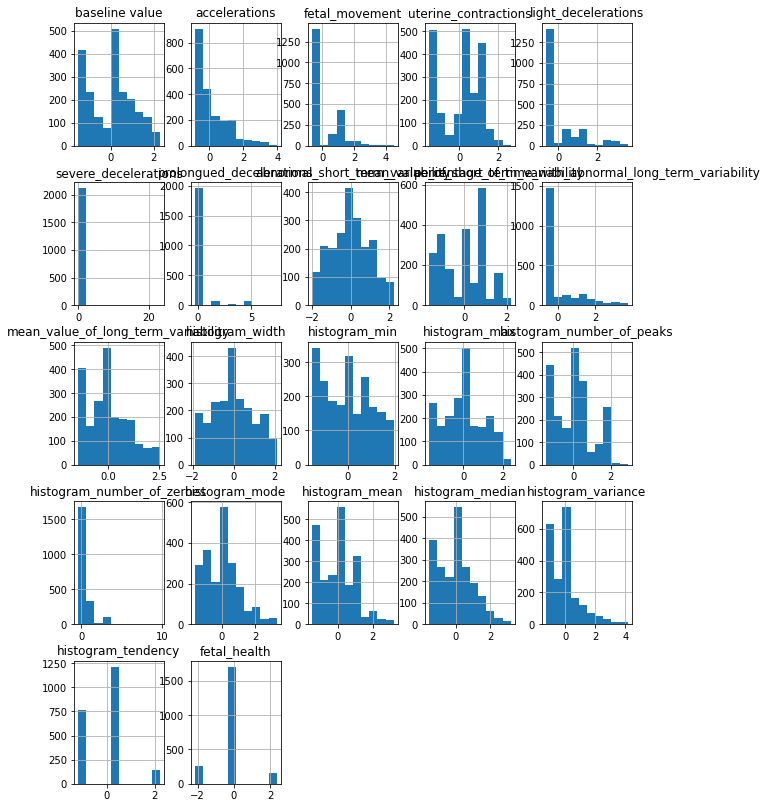

In [46]:
from matplotlib.pyplot import figure

fig = plt.figure(figsize = (10,14))
ax = fig.gca()
fetals_filled_median.hist(ax = ax)

#### Z histogramów można wywnioskować, że w cechach występuje widoczna dominacja jednej z wartości nad pozostałymi.

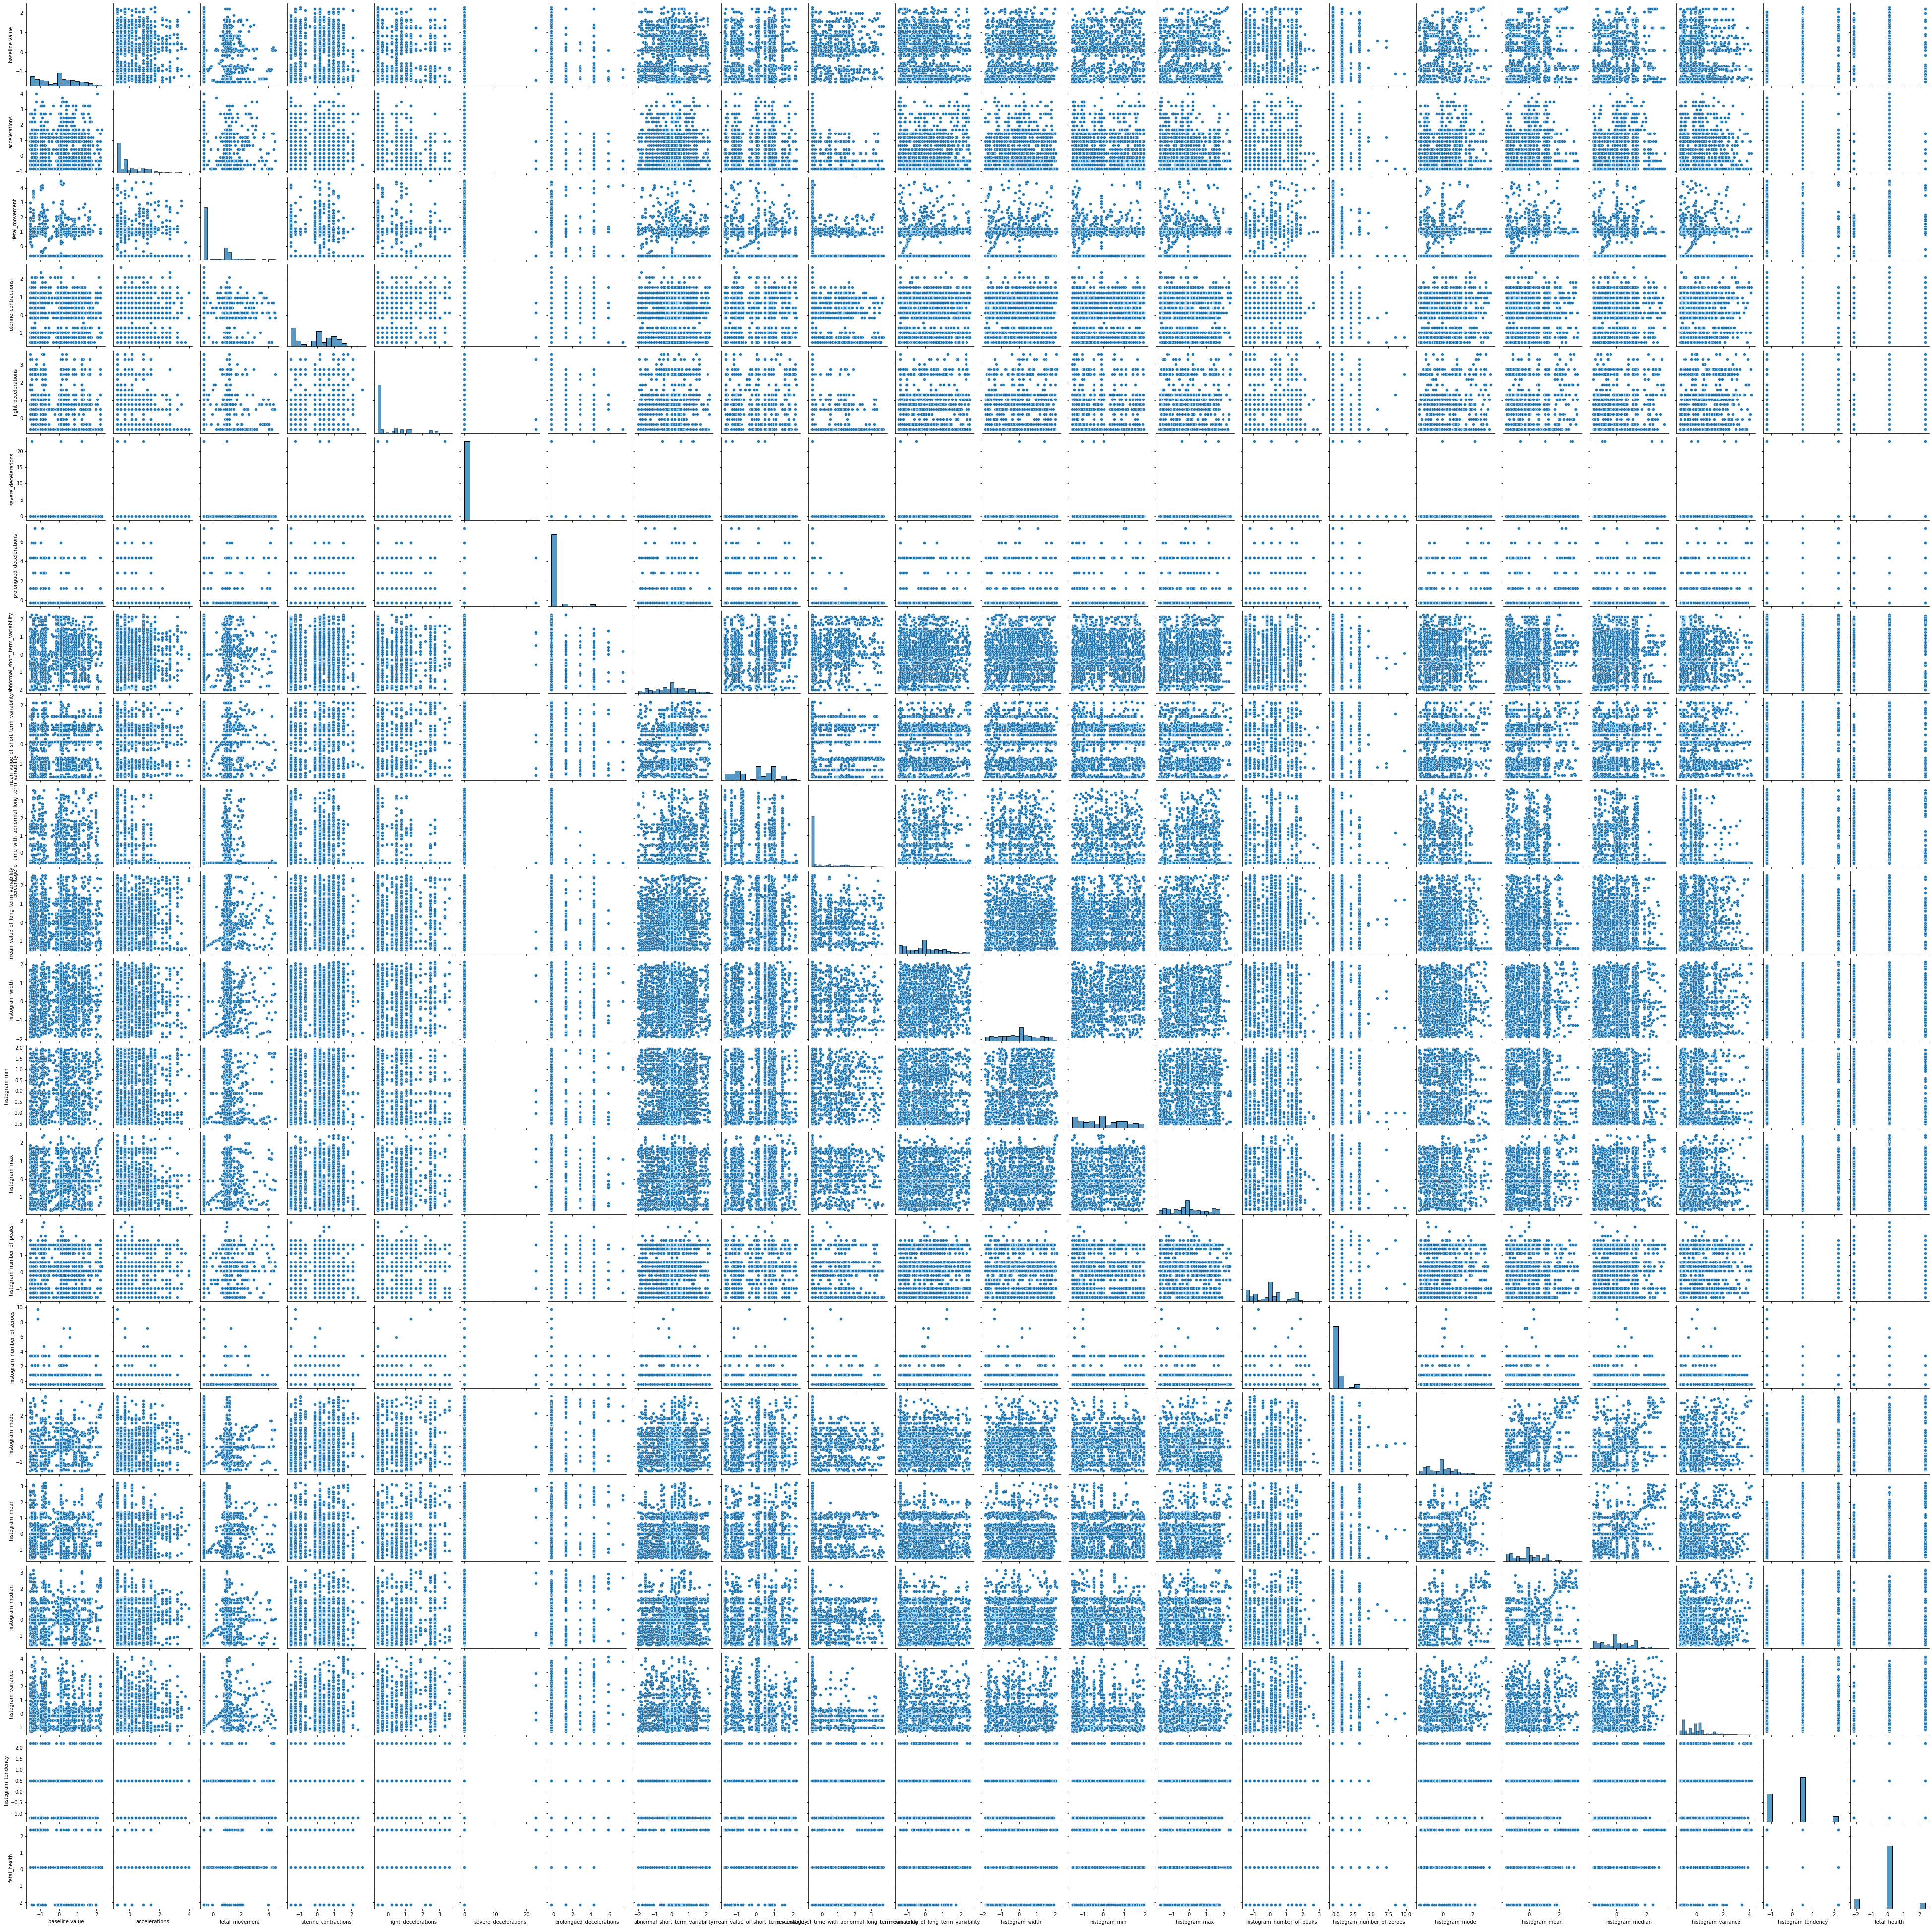

In [47]:
sns.pairplot(fetals_filled_median)

#### Na pierwszy rzut oka widać, że dane w zbiorze są danymi kategorycznymi, a nie ciągłymi.

In [48]:
#sns.pairplot(fetals_filled_median[['class','habitat']])

KeyError: "None of [Index(['class', 'habitat'], dtype='object')] are in the [columns]"

#### Analizując wykres porównujący środowisko występowania grzybów a ich klasę jadalności można zauważyć, że we wszystkich środowiskach występują grzyby jadalne, za to trujące tylko w czterech z pięciu badanych środowisk. Kolejną widoczną zależnością jest najczęstsze występowanie badanych grzybów przy ścieżkach. Co więcej, niezależnie od środowiska występowania grzybów, występuje niewielka przewaga osobników jadalnych.

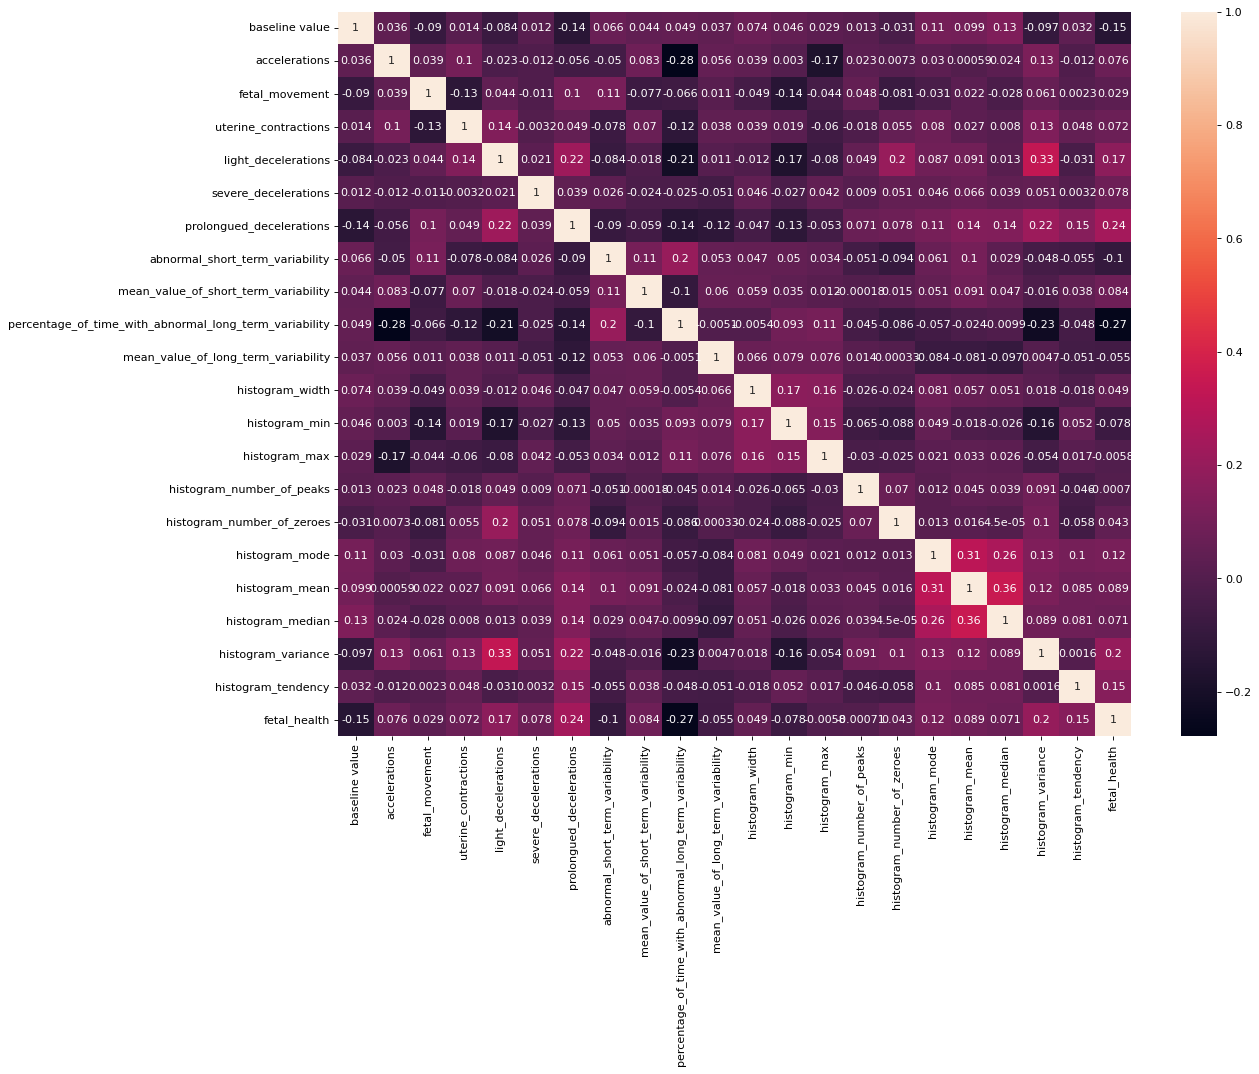

In [49]:
figure(figsize=(16,12),dpi=80)
fetals_matrix = fetals_filled_median.corr()
sns.heatmap(fetals_matrix, annot=True)
plt.show()

#### Analizując macierz korelacji można wywnioskować jak silna jest zależność pomiędzy cechami grzybów. Zauważalna jest przewaga kolorów ciemniejszych, co sugeruje, że dla większości cech ta zależność jest słaba. Są jednak cechy wykazujące się silniejszą zależnością takie jak: kolor nóżki grzyba poniżej i powyżej pierścienia lub kolor czapeczki względem kształu blaszki.

<AxesSubplot:>

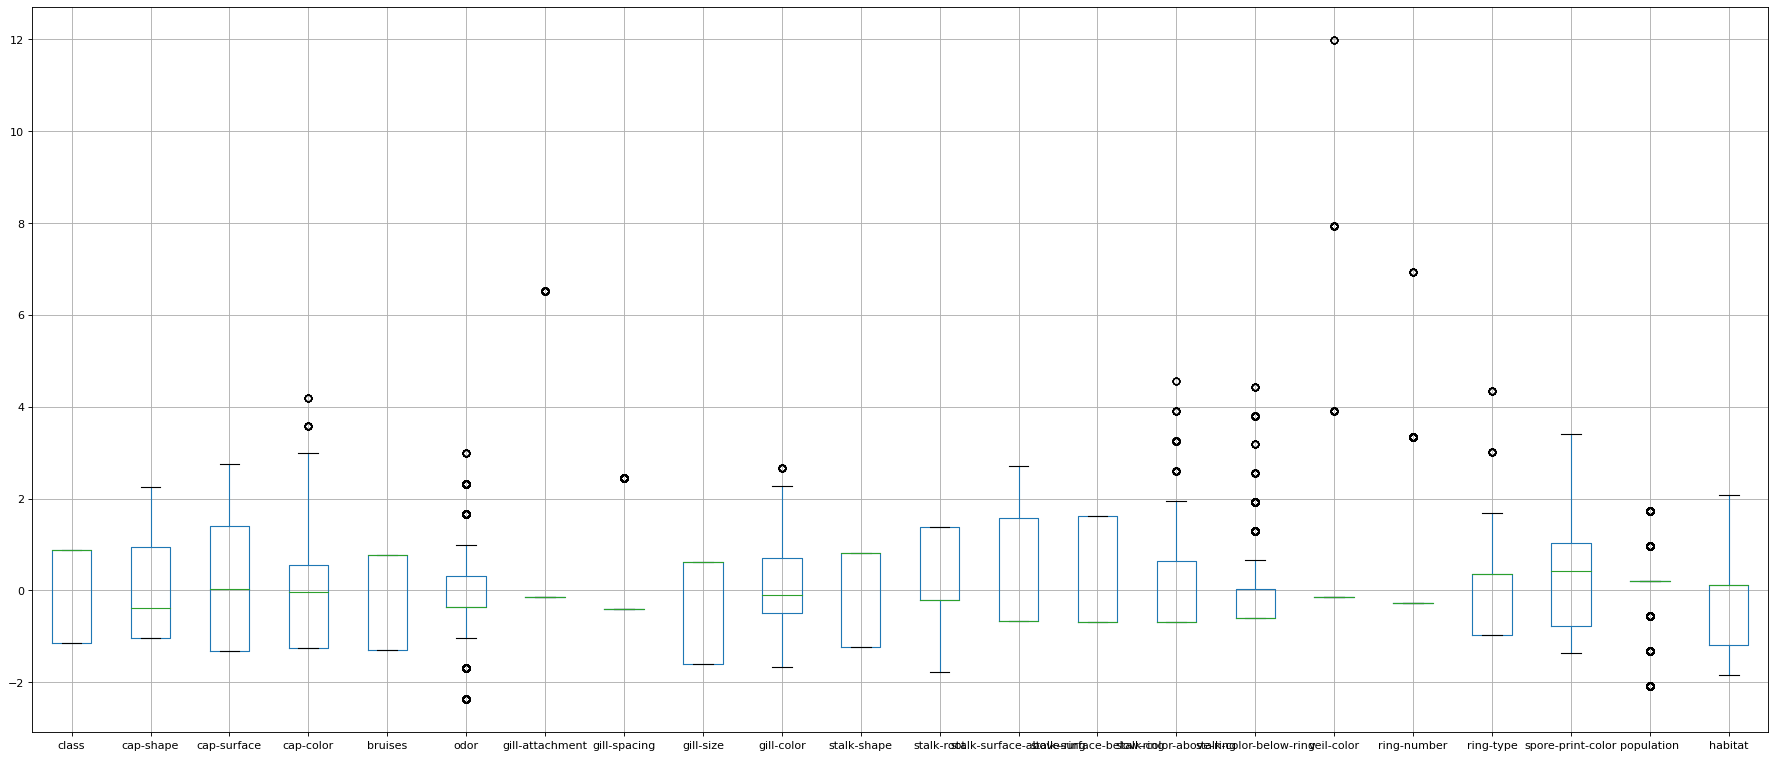

In [ ]:
figure(figsize=(28,12),dpi=80)
fetals_filled_median.boxplot()

#### Analiza boxplotów pokazuje, że większość danych mieści się w pewnym przedziale. Zauważalna jest obecność danych odstających. Obserwując długości wąsów wykresów można stwierdzić lekką asymetrię danych.